<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Assignment6_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import graphviz
import pydot
from io import StringIO  

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

## WINE EXAMPLE

In [6]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 85 (delta 34), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (85/85), done.


In [7]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine['quality'] = wine['quality'] > 6
wine['quality'].describe()

count      1599
unique        2
top       False
freq       1382
Name: quality, dtype: object

In [9]:
np.random.seed(42)
train, test = train_test_split(wine, test_size = 0.5)
val, test = train_test_split(wine, test_size = 0.5)
X_train = train.drop(columns = ['quality']).values
y_train = train['quality'].values
X_val = val.drop(columns = ['quality']).values
y_val = val['quality'].values
X_test = test.drop(columns = ['quality']).values
y_test = test['quality'].values

Tree Classifier

In [10]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

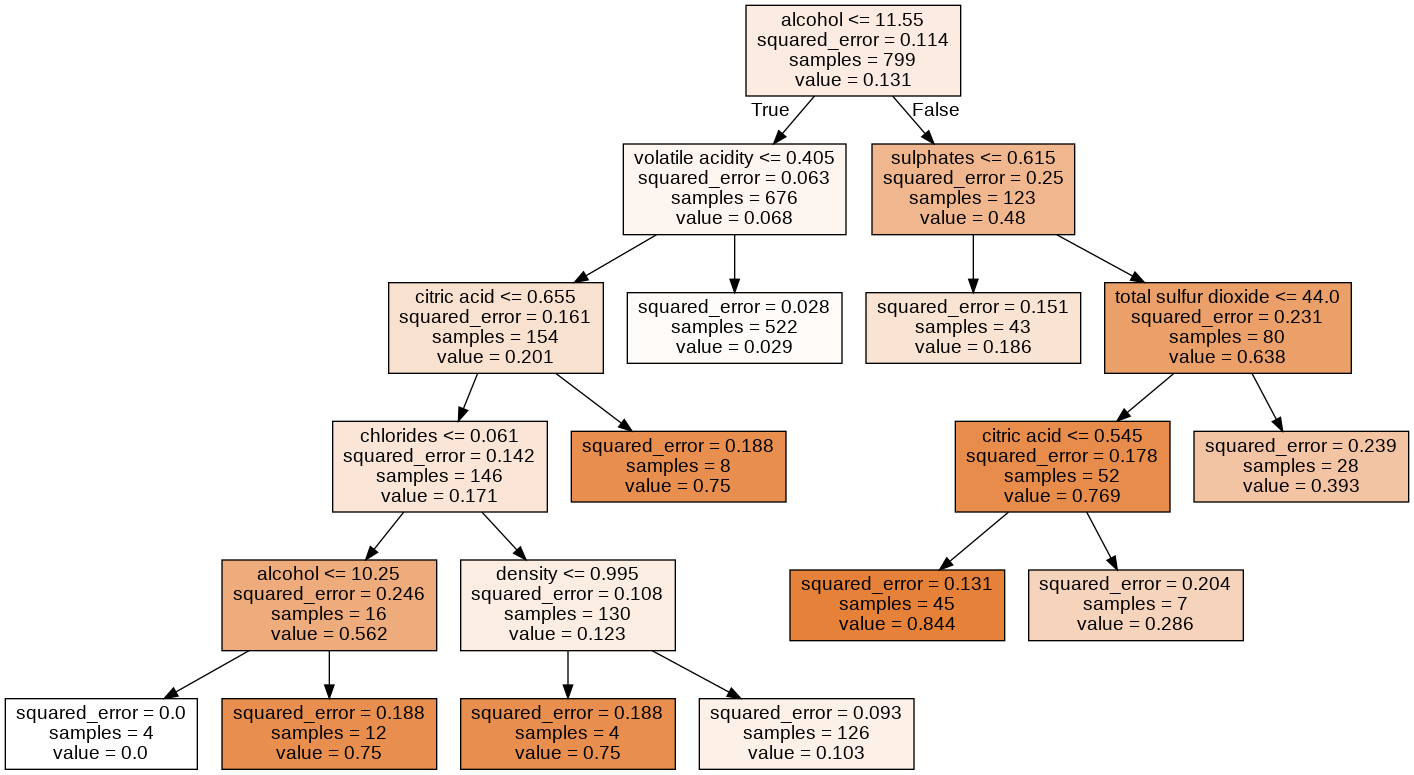

In [11]:
wine_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
wine_tree.fit(X_train, y_train)
graph, = print_tree(wine_tree, features= train.drop(columns = ['quality']).columns)
Image(graph.create_png())

In [12]:
wine_tree_preds = wine_tree.predict(X_test)

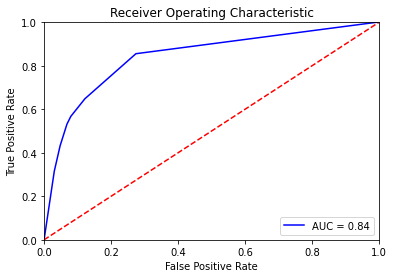

In [15]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [20]:
wine_rf = RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=1)
wine_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=1)

In [22]:
wine_rf_preds = wine_rf.predict(X_test)

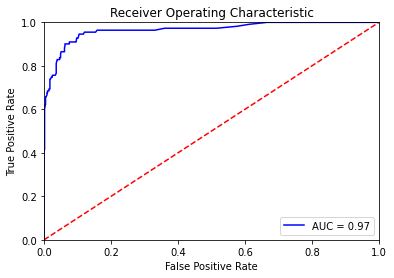

In [23]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_rf_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
confusion_matrix(test['quality'], (wine_rf_preds > 0.5))

array([[677,  12],
       [ 31,  80]])

Boosting

In [24]:
wine_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,random_state=1)
wine_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, random_state=1)

In [25]:
wine_boost_preds = wine_boost.predict(X_test)

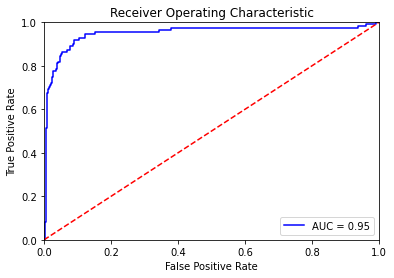

In [26]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_boost_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()